# Corrections from SIDI MC + GEMC
calculations by Jason M. P.

last edit Apr-28, 2023

## Imports and definitions

In [1]:
import sys; 
software_path = '/Users/erezcohen/Desktop/Software/'
sys.path.insert(0, software_path + '/mySoftware/Python/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/AcceptanceCorrections/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/');
from my_tools                     import *; 
from plot_tools                   import *;
from my_data_analysis_tools       import *;
from acceptance_correction_tools  import *;
from sidis_analysis_tools         import *;

In [2]:
%config InlineBackend.figure_format = 'retina'
plt.rcParams['mathtext.fontset']    = 'stix'
plt.rcParams['font.family']         = 'STIXGeneral'

In [7]:
import ROOT 

Welcome to JupyROOT 6.26/06


# Define binning 

In [70]:
MCCorrections_binWidth_xB = 0.05;
MCCorrections_binCenters_xB = np.arange(0.125,0.625,0.05); MCCorrections_Nbins_xB = len(MCCorrections_binCenters_xB); 

MCCorrections_binWidth_Q2 = 0.5;
MCCorrections_binCenters_Q2 = np.arange(2.25,8.25,0.5);    MCCorrections_Nbins_Q2 = len(MCCorrections_binCenters_Q2); 

MCCorrections_binWidth_z  = 0.05;
MCCorrections_binCenters_z  = np.arange(0.325,1.025,0.05);  MCCorrections_Nbins_z  = len(MCCorrections_binCenters_z);  

BinMigrationWeights = dict();
AcceptanceWeights   = dict();
BinMigrationWeights['piplus']  = np.zeros([MCCorrections_Nbins_xB, MCCorrections_Nbins_Q2, MCCorrections_Nbins_z])
BinMigrationWeights['piminus'] = np.zeros([MCCorrections_Nbins_xB, MCCorrections_Nbins_Q2, MCCorrections_Nbins_z])
AcceptanceWeights['piplus']    = np.zeros([MCCorrections_Nbins_xB, MCCorrections_Nbins_Q2, MCCorrections_Nbins_z])
AcceptanceWeights['piminus']   = np.zeros([MCCorrections_Nbins_xB, MCCorrections_Nbins_Q2, MCCorrections_Nbins_z])


In [118]:
MCCorrections_binCenters_xB

array([0.125, 0.175, 0.225, 0.275, 0.325, 0.375, 0.425, 0.475, 0.525,
       0.575])

# Load Jason calculation results

In [71]:
corrections_data_path = '/Users/erezcohen/Desktop/Software/CLAS12/BAND/SIDIS_at_BAND/MC/Acceptance_Corrections/JasonAcceptanceCorrections/'
filename_binmigration_corr_pips = corrections_data_path + 'bin_migration_piplus_hists.root'
filename_binmigration_corr_pims = corrections_data_path + 'bin_migration_piminus_hists.root'
filename_acceptance_corr_pips   = corrections_data_path + 'acceptance_map_piplus_hists.root'
filename_acceptance_corr_pims   = corrections_data_path + 'acceptance_map_piminus_hists.root'

In [72]:
f1 = ROOT.TFile.Open( filename_binmigration_corr_pips,"READ" )
hBinMigrationWeights_pips = f1.Get("hWeights")
f2 = ROOT.TFile.Open( filename_binmigration_corr_pims,"READ" )
hBinMigrationWeights_pims = f2.Get("hWeights")

f3 = ROOT.TFile.Open( filename_acceptance_corr_pips,"READ" )
hAcceptanceWeights_pips = f3.Get("hWeights")
f4 = ROOT.TFile.Open( filename_acceptance_corr_pims,"READ" )
hAcceptanceWeights_pims = f4.Get("hWeights")

In [74]:
for bin_x in range(MCCorrections_Nbins_xB):
    xB = MCCorrections_binCenters_xB[bin_x]
    
    for bin_Q2 in range(MCCorrections_Nbins_Q2):
        Q2 = MCCorrections_binCenters_Q2[bin_Q2]
        
        for bin_z in range(MCCorrections_Nbins_z):
            z = MCCorrections_binCenters_z[bin_z]
            
            # In root, the zeroeth bin is the "underflow bin," so it is not filled. Basically, the first actual bin will have index 1
            BinMigrationWeights['piplus'] [bin_x][bin_Q2][bin_z] = hBinMigrationWeights_pips.GetBinContent(bin_x+1, bin_Q2+1, bin_z+1)
            BinMigrationWeights['piminus'][bin_x][bin_Q2][bin_z] = hBinMigrationWeights_pims.GetBinContent(bin_x+1, bin_Q2+1, bin_z+1)
            AcceptanceWeights['piplus']   [bin_x][bin_Q2][bin_z] = hAcceptanceWeights_pips.GetBinContent  (bin_x+1, bin_Q2+1, bin_z+1)
            AcceptanceWeights['piminus']  [bin_x][bin_Q2][bin_z] = hAcceptanceWeights_pims.GetBinContent  (bin_x+1, bin_Q2+1, bin_z+1)            
            
print('done reading TH3D.')            

done reading TH3D.


## (2.1) Plot bin migration and acceptance weights for $\pi^{\pm}$

In [133]:
arr2Plot = BinMigrationWeights['piplus'];
# arr2Plot = BinMigrationWeights['piminus'];
# arr2Plot = AcceptanceWeights['piplus']
# arr2Plot = AcceptanceWeights['piminus']

### (2.1.1) 1D

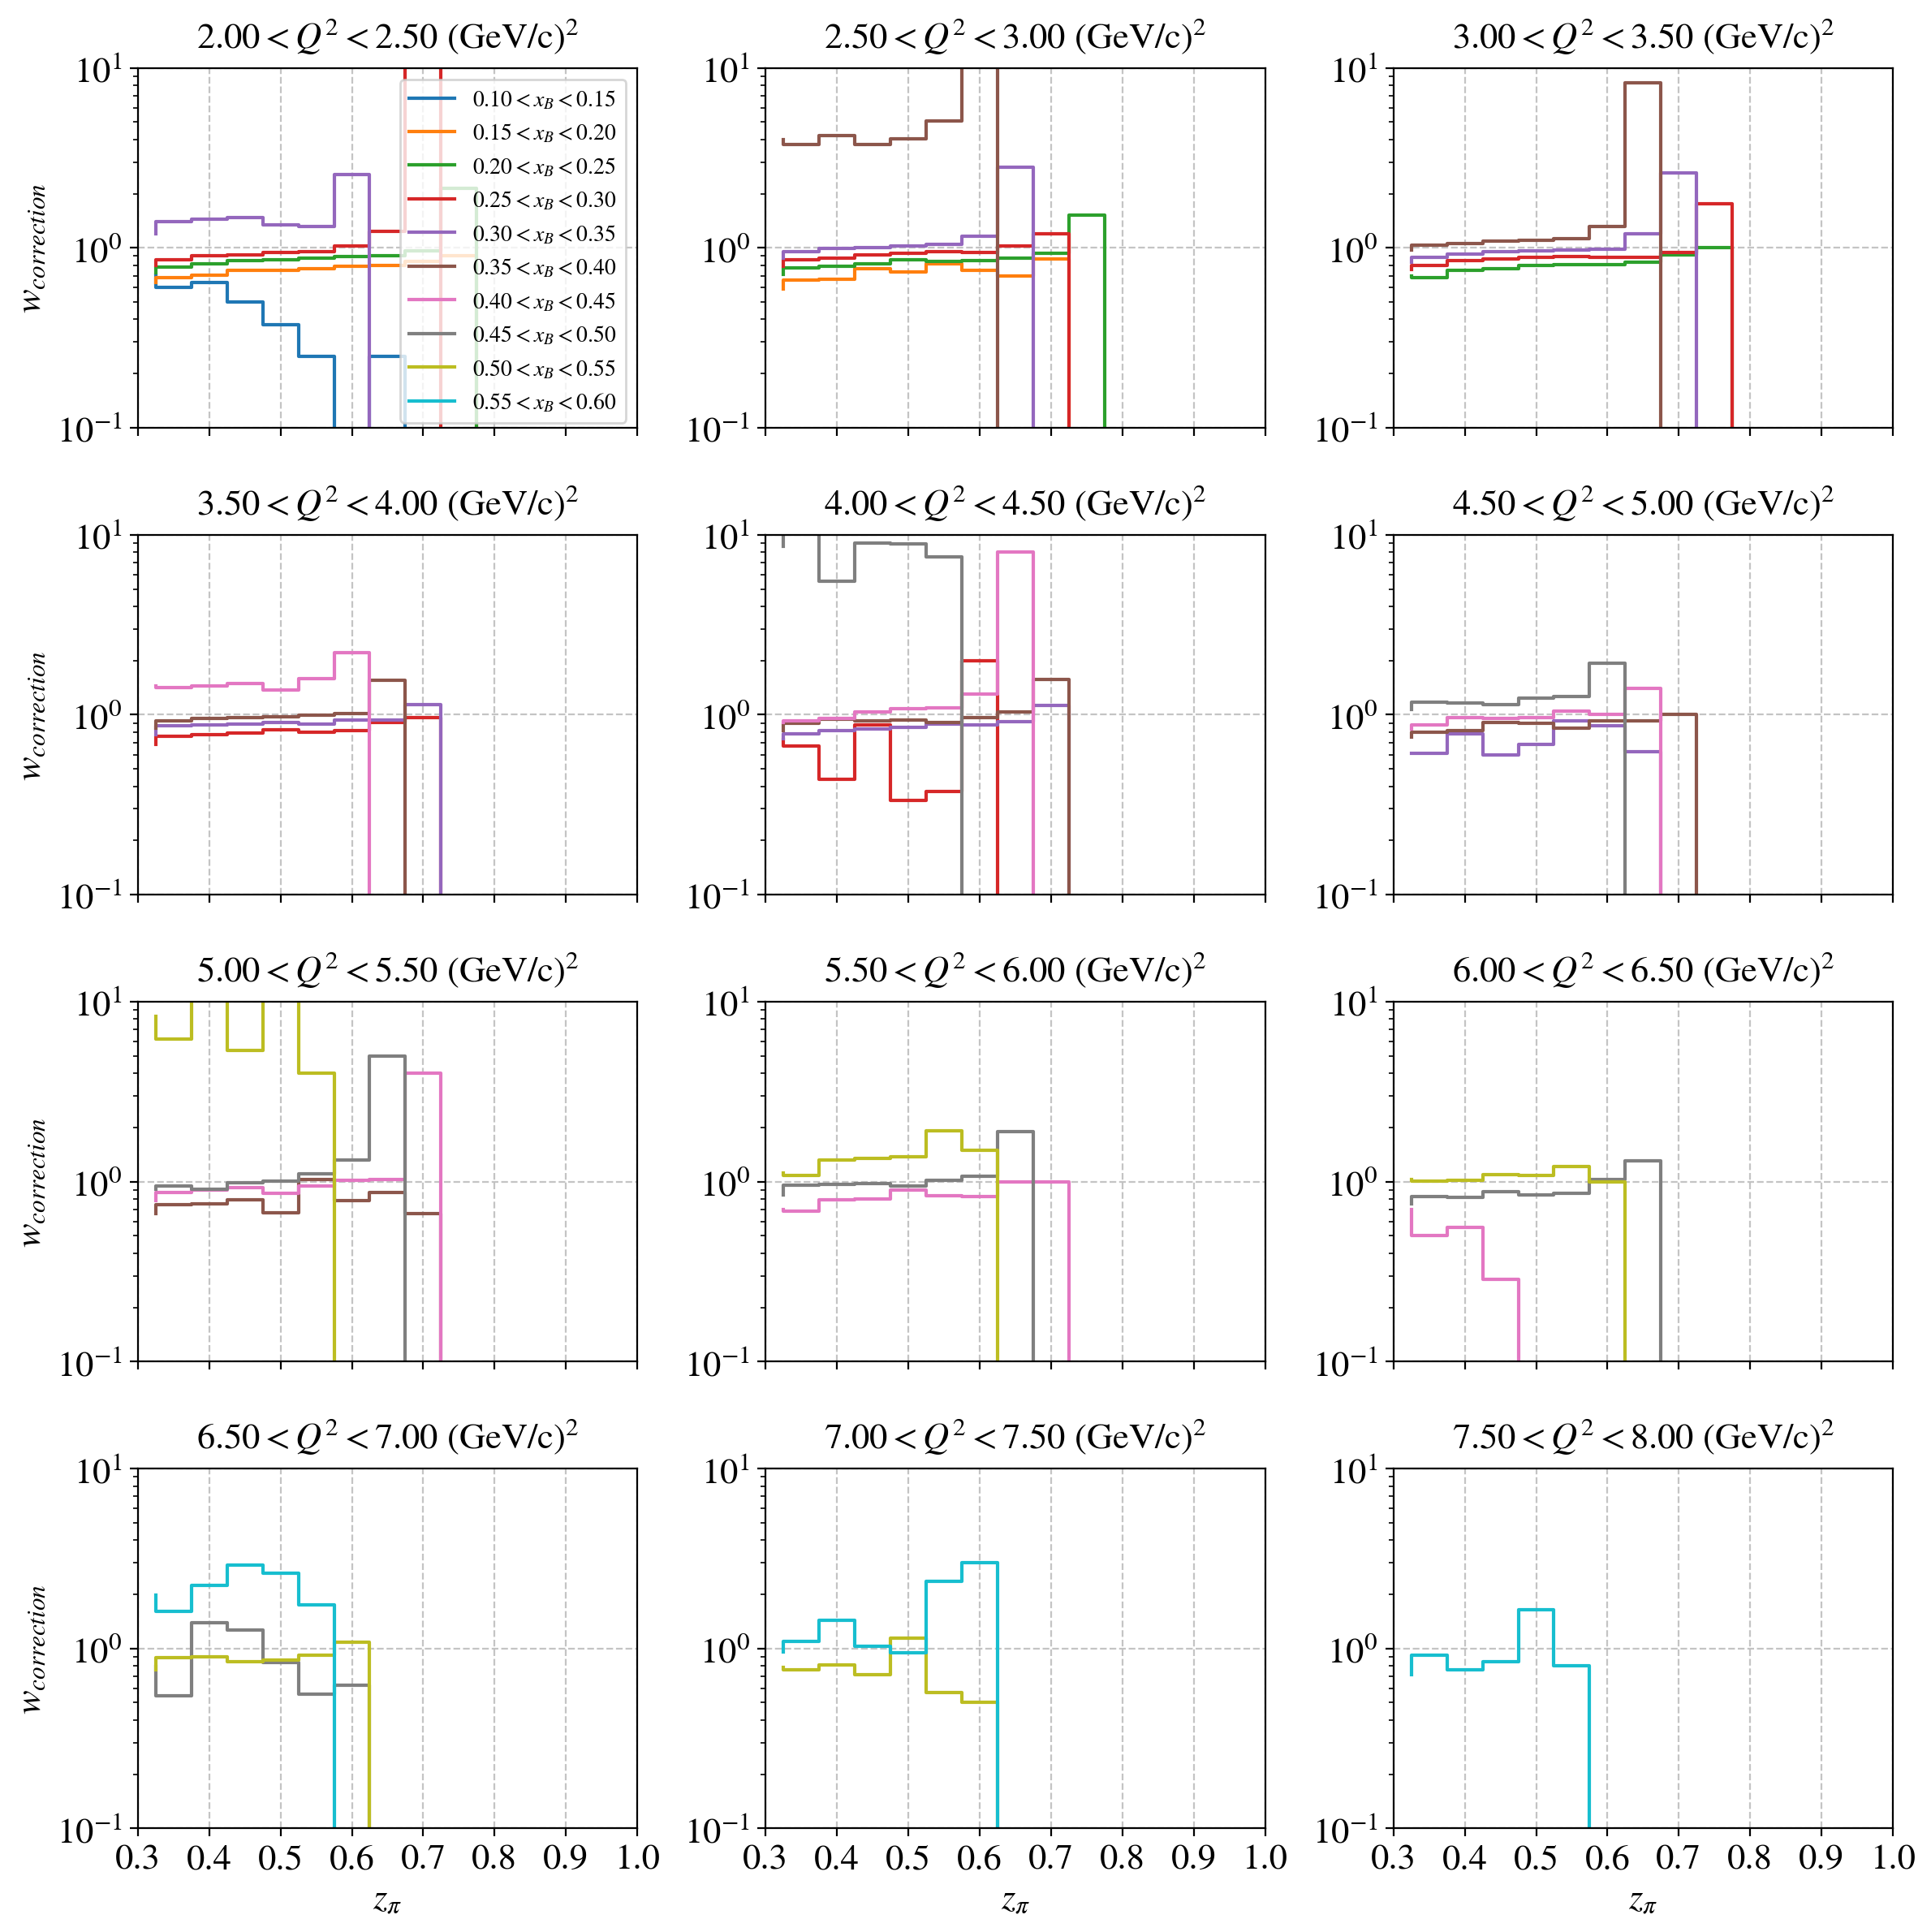

In [134]:
ylim=(1e-1,1e1)
fig = plt.figure(figsize=(12,12),tight_layout=True)
for bin_Q2 in range(MCCorrections_Nbins_Q2):
    Q2_center = MCCorrections_binCenters_Q2[bin_Q2]
    Q2_min, Q2_max = Q2_center - binWidth_Q2/2, Q2_center + binWidth_Q2/2
    
    ax = fig.add_subplot(4,3,bin_Q2+1)        
    for bin_x in range(MCCorrections_Nbins_xB):
        xB_center = MCCorrections_binCenters_xB[bin_x]
        xB_min, xB_max = xB_center - binWidth_xB/2, xB_center + binWidth_xB/2

        r = arr2Plot[bin_x,bin_Q2,:];
        plt.step( MCCorrections_binCenters_z, r, label='$%.2f<x_B<%.2f$'%(xB_min, xB_max))
    
    set_axes(ax,'$z_{\pi}$' if bin_Q2>=9 else '',
             '$w_{correction}$' if bin_Q2%3==0 else '',
             remove_ticks_x=False if bin_Q2>=9 else True,
             remove_ticks_y=False if bin_Q2%3==0 else True,
             title='$%.2f<Q^2<%.2f$ (GeV/c)$^2$'%(Q2_min, Q2_max),
             xlim=(0.3,1),
             ylim=ylim,
             do_add_legend=False, do_add_grid=True,fontsize=16,)
    
    ax.set_yscale('log')
    if bin_Q2==0: ax.legend(fontsize=10)

### (2.1.2) 2D ($x_B$ vs. $z$ in bins of $Q^2$ and so on..)

In [125]:
arr2Plot = AcceptanceWeights['piplus']

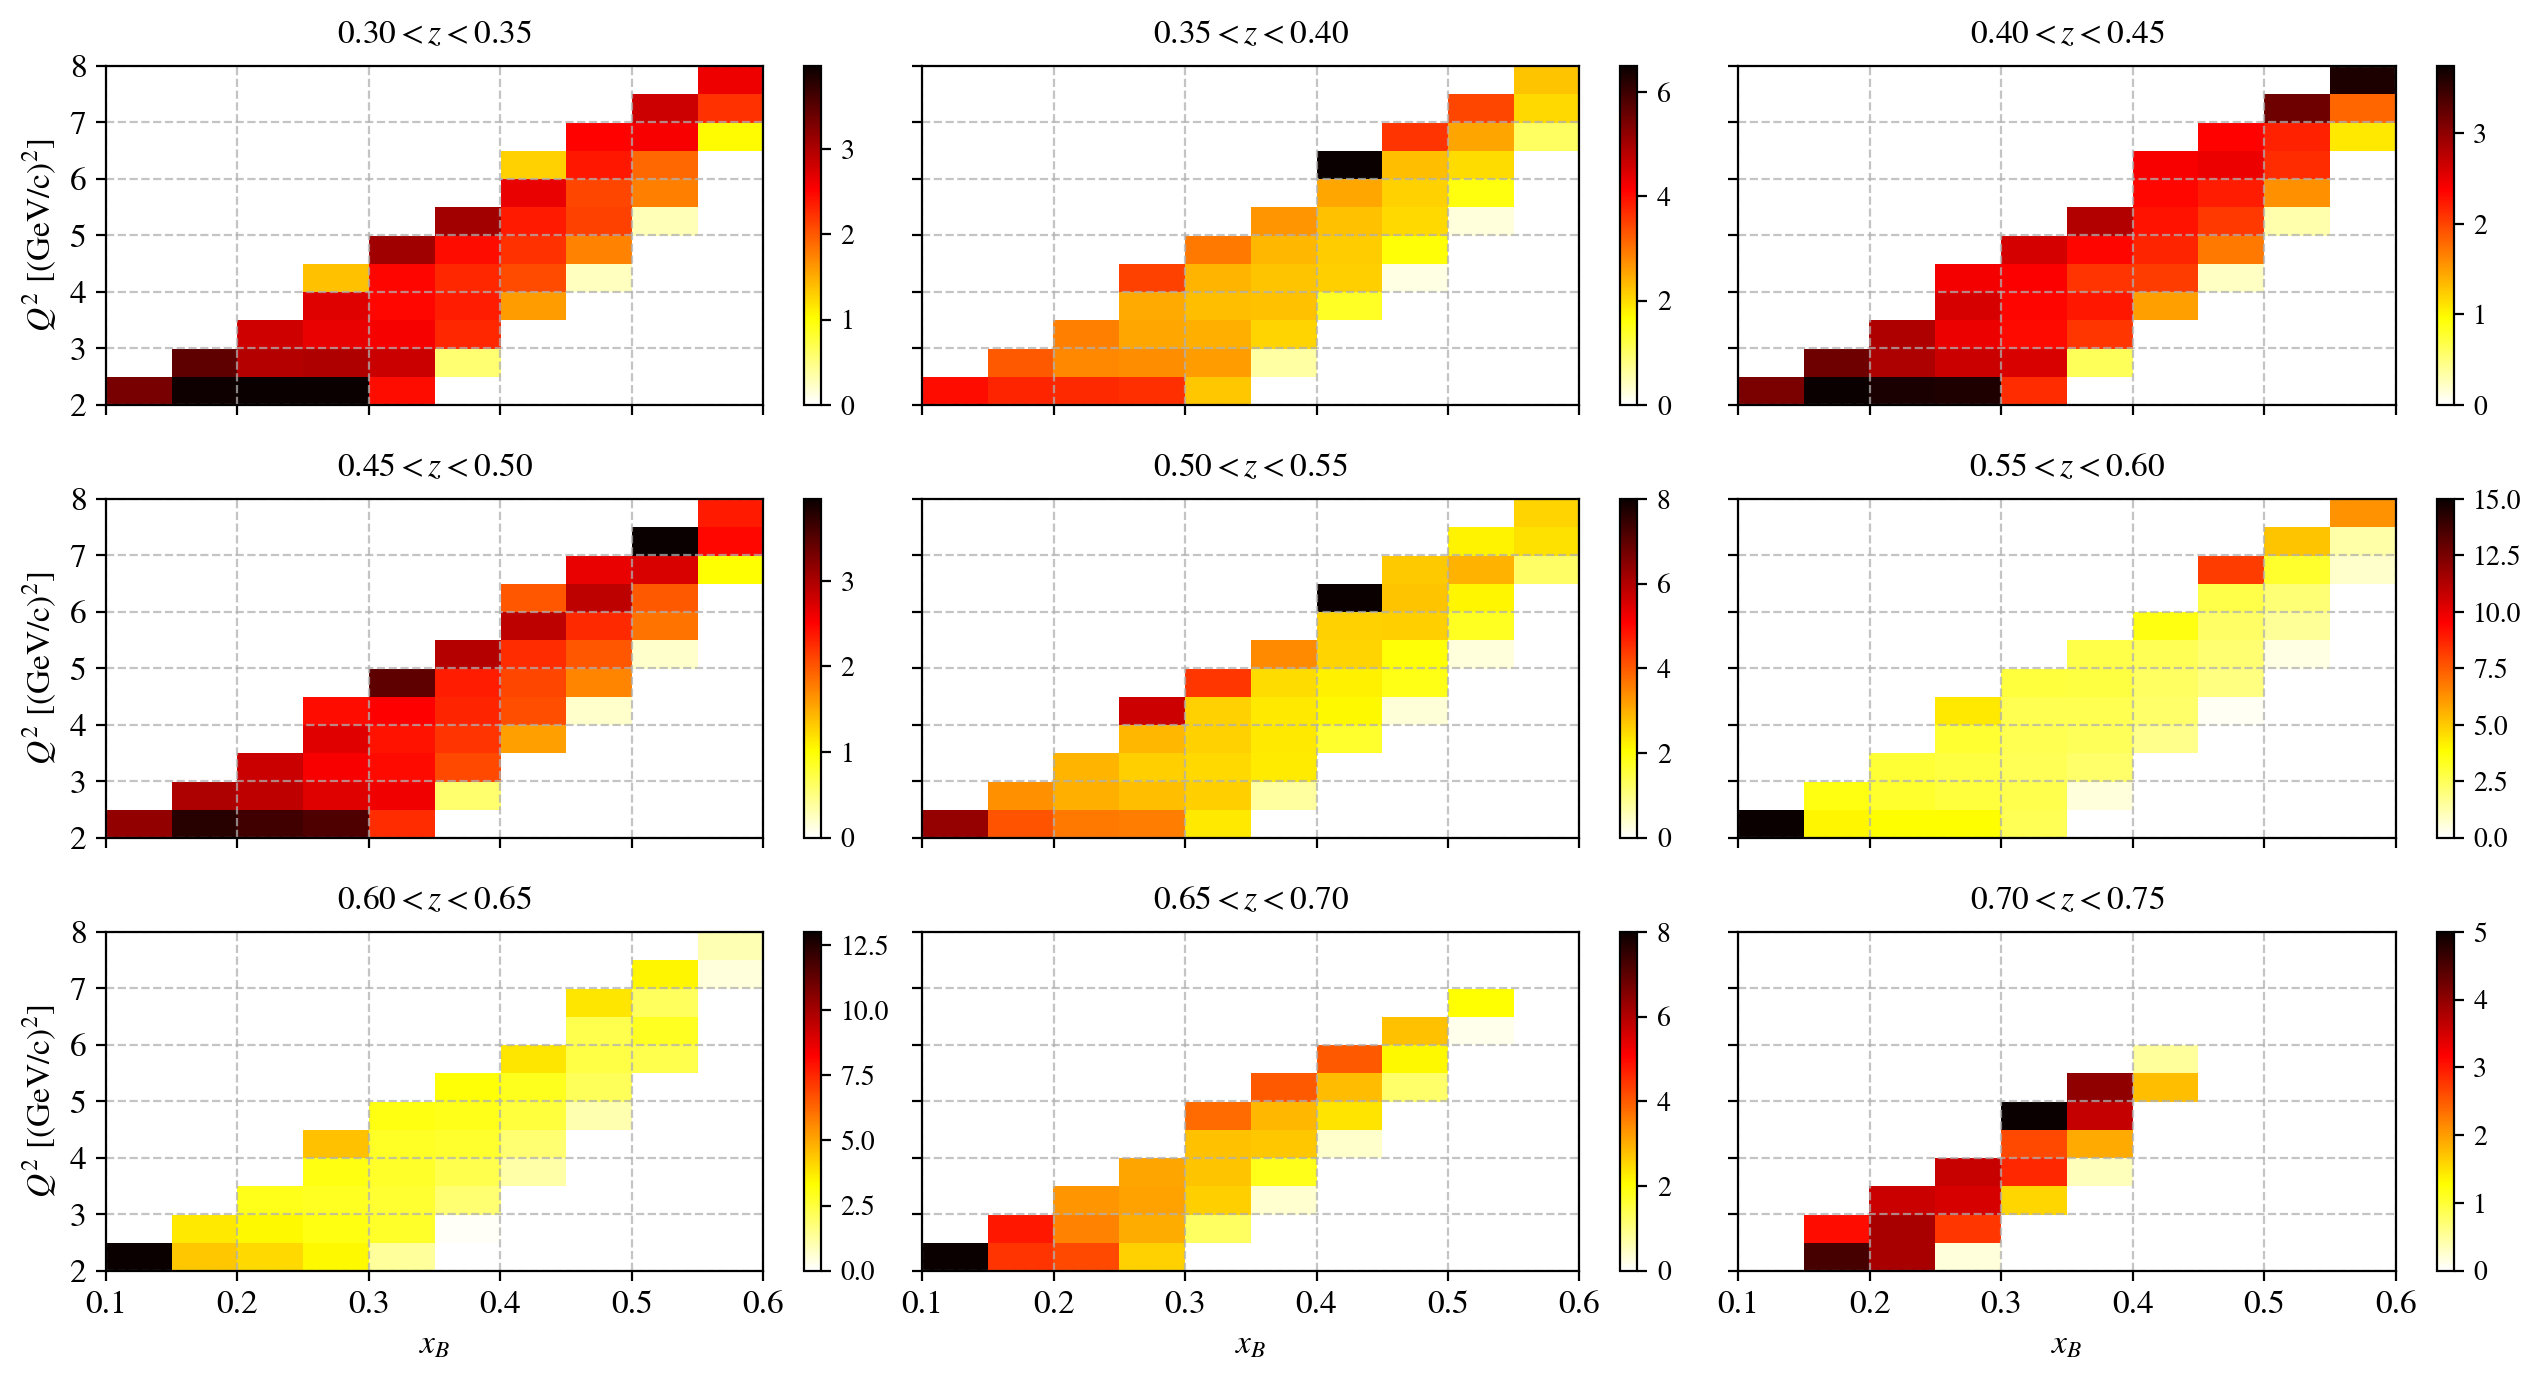

In [132]:
fig = plt.figure(figsize=(13,7),tight_layout=True)
for bin_z in range(9):
    z_center = binCenters_z[bin_z]
    z_min, z_max = z_center - binWidth_z/2, z_center + binWidth_z/2
    
    Corr_xB_Q2 = arr2Plot[:,:,bin_z];
    
    ax = fig.add_subplot(3,3,bin_z+1)        
    im=ax.imshow( Corr_xB_Q2.T, 
                 cmap='hot_r',origin='lower' ,
                 extent=(np.min(MCCorrections_binCenters_xB) - MCCorrections_binWidth_xB/2 ,np.max(MCCorrections_binCenters_xB) + MCCorrections_binWidth_xB/2,
                         np.min(MCCorrections_binCenters_Q2) - MCCorrections_binWidth_Q2/2 ,np.max(MCCorrections_binCenters_Q2) + MCCorrections_binWidth_Q2/2)
                 # vmin=0,vmax=4
                )
    cbar=plt.colorbar(im)
    
    set_axes(ax,'$x_B$' if bin_z>=6 else '',
             '$Q^2$ [(GeV/c)$^2$]' if bin_z%3==0 else '',
             remove_ticks_x=False if bin_z>=6 else True,
             remove_ticks_y=False if bin_z%3==0 else True,
             title='$%.2f<z<%.2f$'%(z_min, z_max),
             xticks=np.arange(0.1,0.65,0.1),
             yticks=np.arange(2,9,1),
             do_add_legend=False,
             do_add_grid=True,fontsize=12)
    

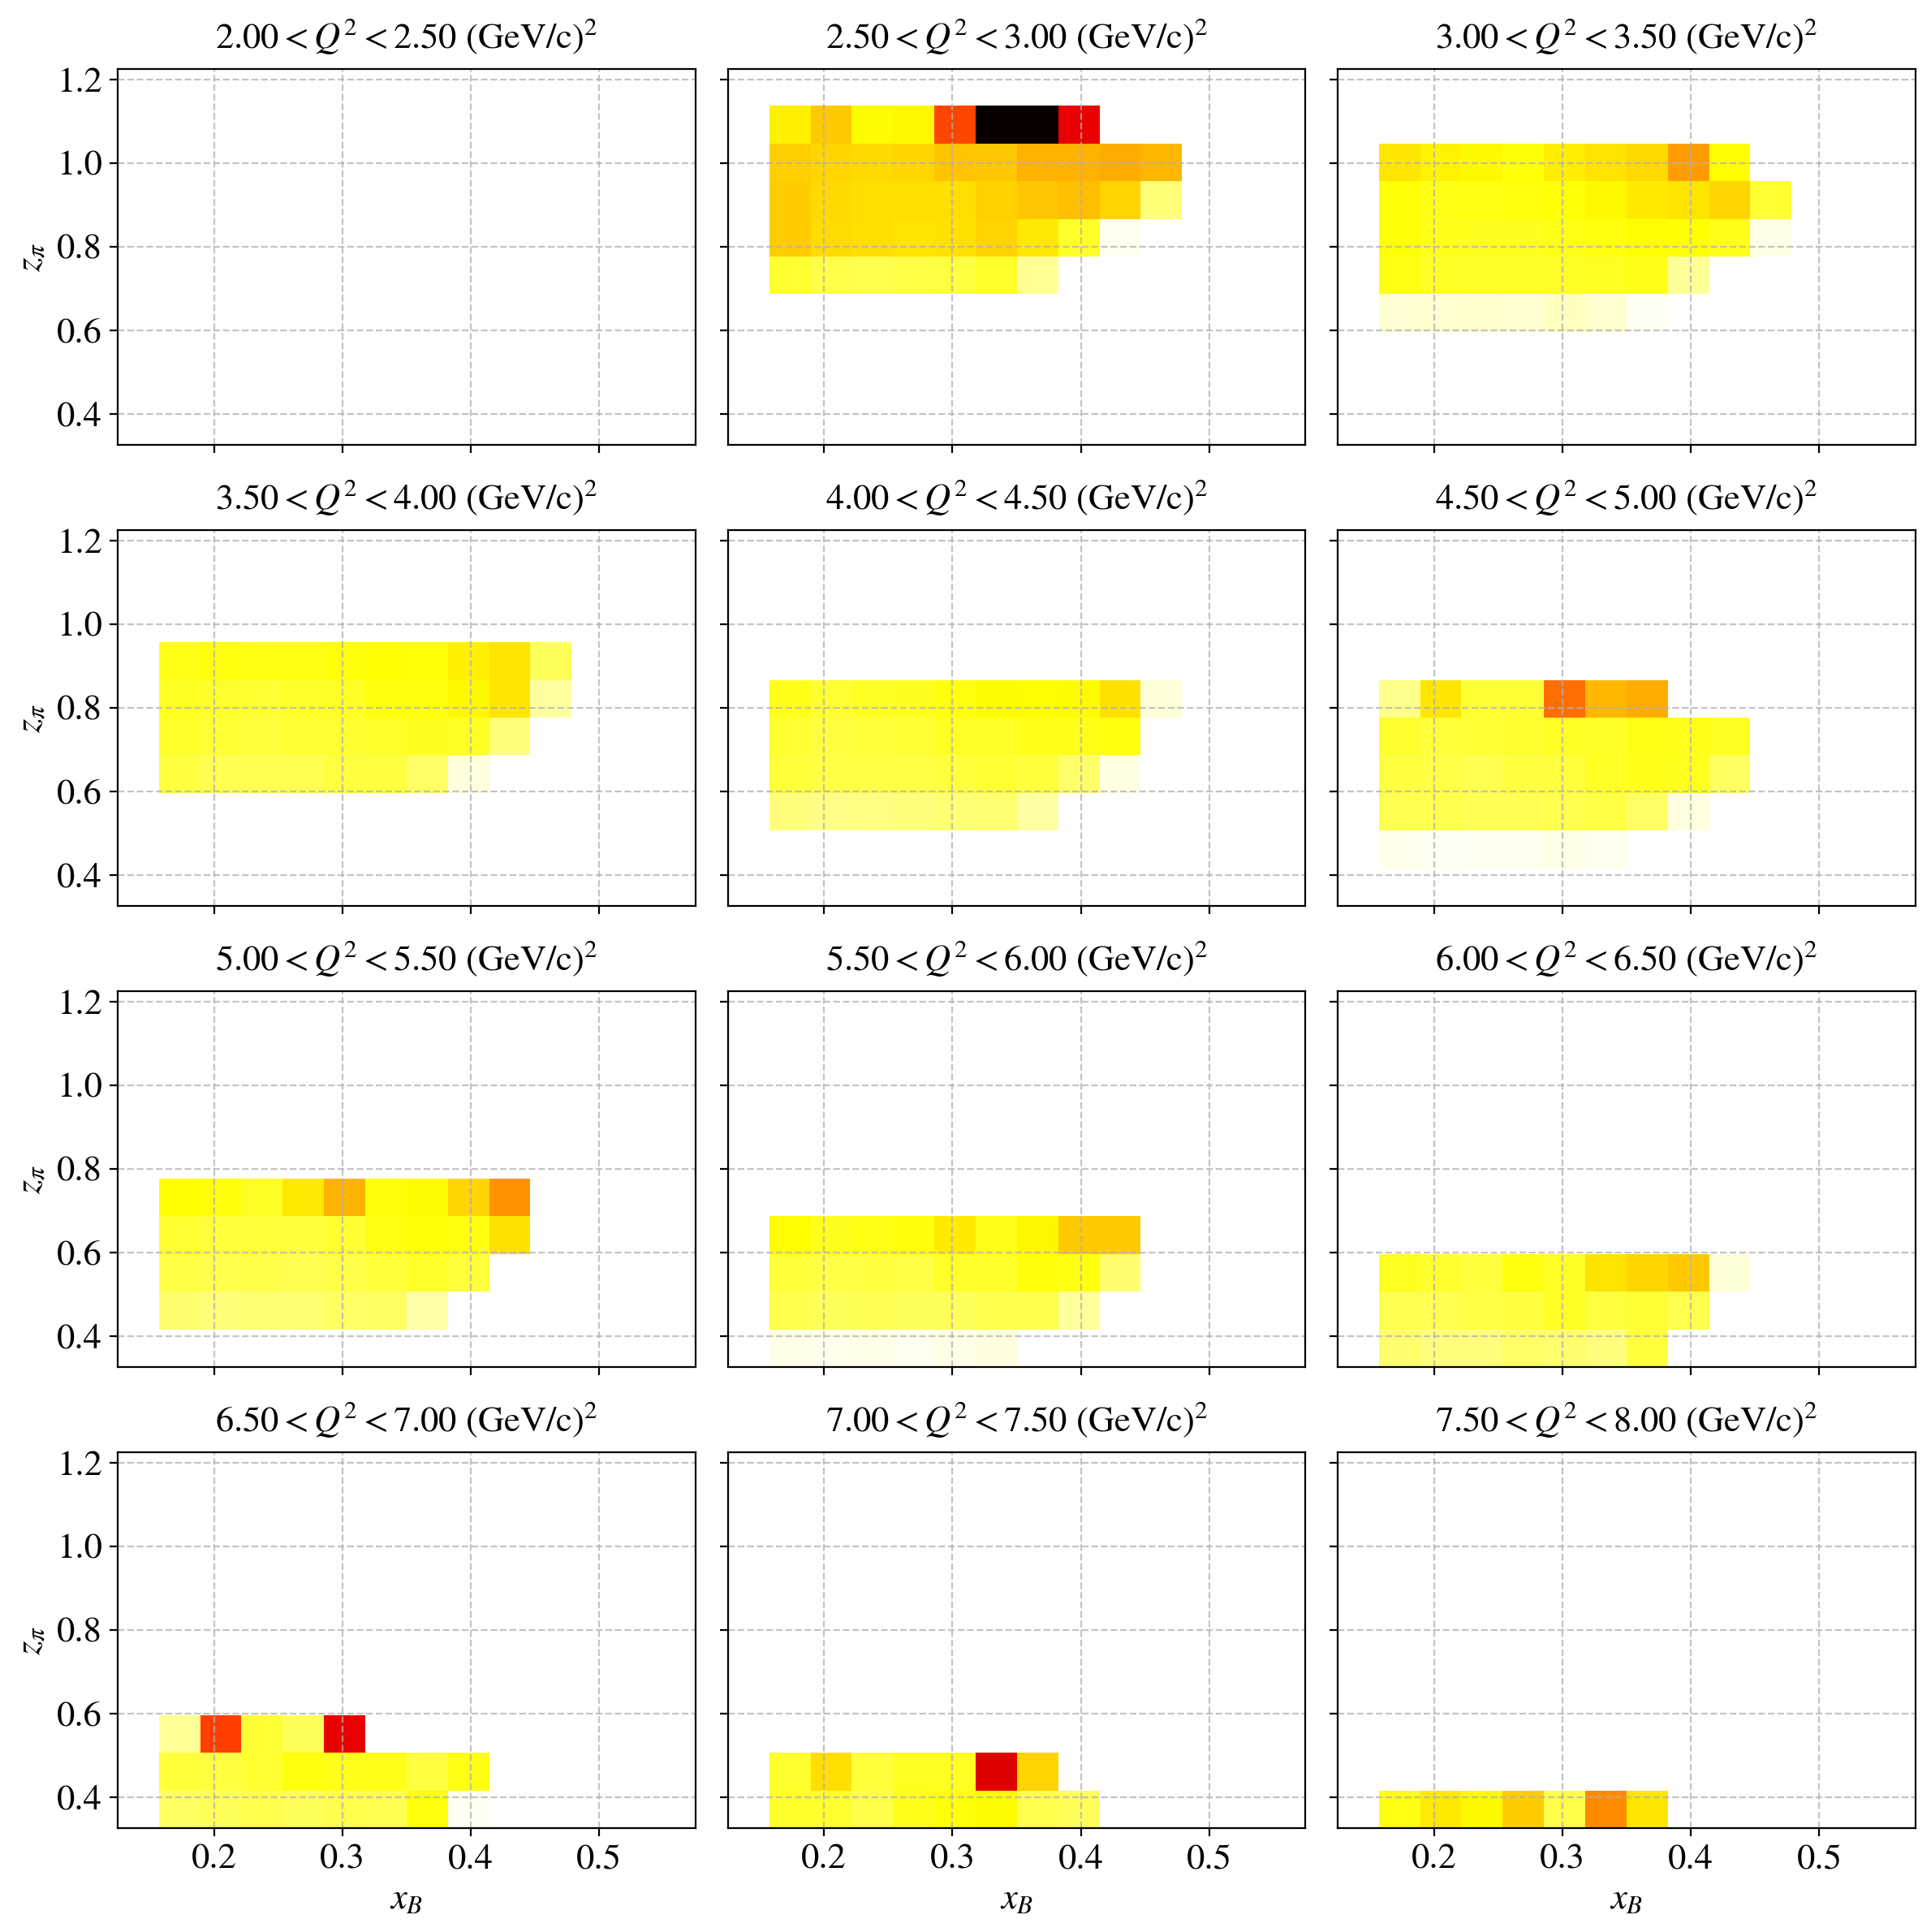

In [38]:
fig = plt.figure(figsize=(12,12),tight_layout=True)
for bin_Q2 in range(MCCorrections_Nbins_Q2):
    Q2_center = binCenters_Q2[bin_Q2]
    Q2_min, Q2_max = Q2_center - binWidth_Q2/2, Q2_center + binWidth_Q2/2
    
    ax = fig.add_subplot(4,3,bin_Q2+1)        
    im=ax.imshow( arr2Plot[:,bin_Q2,:], cmap='hot_r', 
              extent=(np.min(binCenters_xB),np.max(binCenters_xB),
                      np.min(binCenters_z),np.max(binCenters_z)), 
                 vmin=0,vmax=12 )
    # cbar=plt.colorbar(im)
    
    set_axes(ax,'$x_B$' if bin_Q2>=9 else '',
             '$z_{\pi}$' if bin_Q2%3==0 else '',
             remove_ticks_x=False if bin_Q2>=9 else True,
             remove_ticks_y=False if bin_Q2%3==0 else True,
             title='$%.2f<Q^2<%.2f$ (GeV/c)$^2$'%(Q2_min, Q2_max),
             # xlim=(0.3,1),
             do_add_legend=False,
             do_add_grid=True,fontsize=16)
    

In [22]:
MCCorrections_Nbins_z

19